In [98]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Visualisation des données

In [99]:
df = pd.read_csv("../csv/kc_house_data.csv")

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Aucune valeur manquante

In [101]:
df.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [102]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Il n'y a pas de valeur dupliquée

Convertion de la date

In [103]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT000000')
df["month"] = df['date'].dt.month

In [104]:
# df['date'] = df["date"].dt.strftime('%Y-%m')


In [105]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000


Je remarque qu'il y a une maison avec 33 chambres et des maisons sans chambres et sans salle de bain

### Supression des lignes dont les maisons n'ont pas de salle de bain et de chambre et les maisons où il y a 33 chambres 

In [106]:
mask = (df["bedrooms"] != 0) & (df["bedrooms"] != 33)
mask2 = df["bathrooms"] != 0 

In [107]:
# df = df[mask & mask2]

# Distribution des variables catégorielles

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

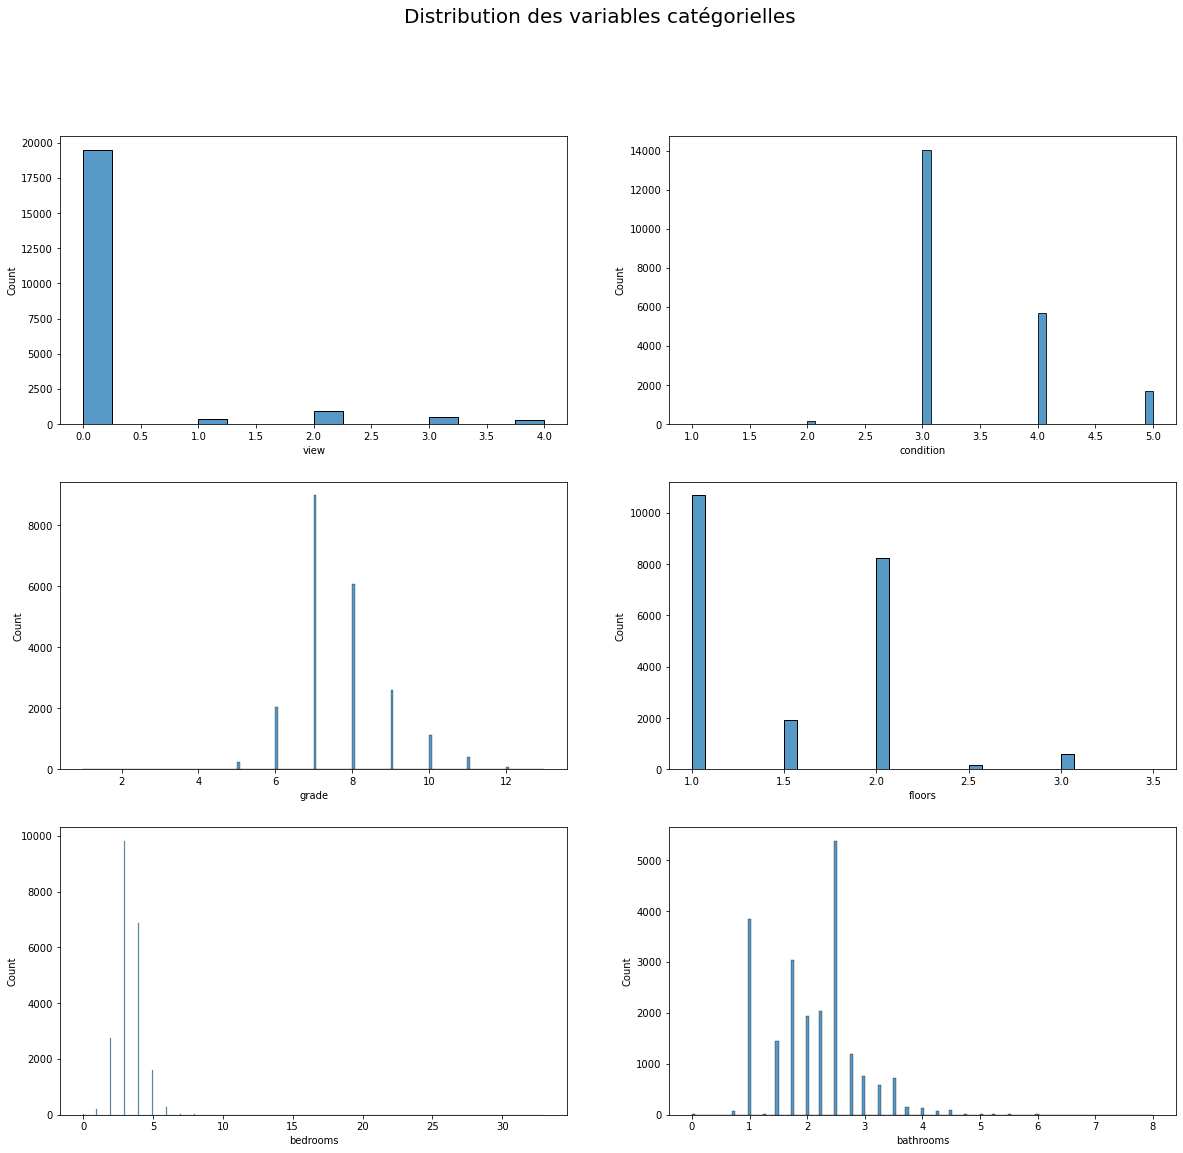

In [108]:
fig, ax = plt.subplots(3,2, figsize=(20, 18))
plt.suptitle('Distribution des variables catégorielles', fontsize=20)
sns.histplot(ax=ax[0,0],x='view',data=df)
sns.histplot(ax=ax[0,1],x='condition',data=df)
sns.histplot(ax=ax[1,0],x='grade',data=df)
sns.histplot(ax=ax[1,1],x='floors',data=df)
sns.histplot(ax=ax[2,0],x='bedrooms',data=df)
sns.histplot(ax=ax[2,1],x='bathrooms',data=df)

# Visualisation Carte

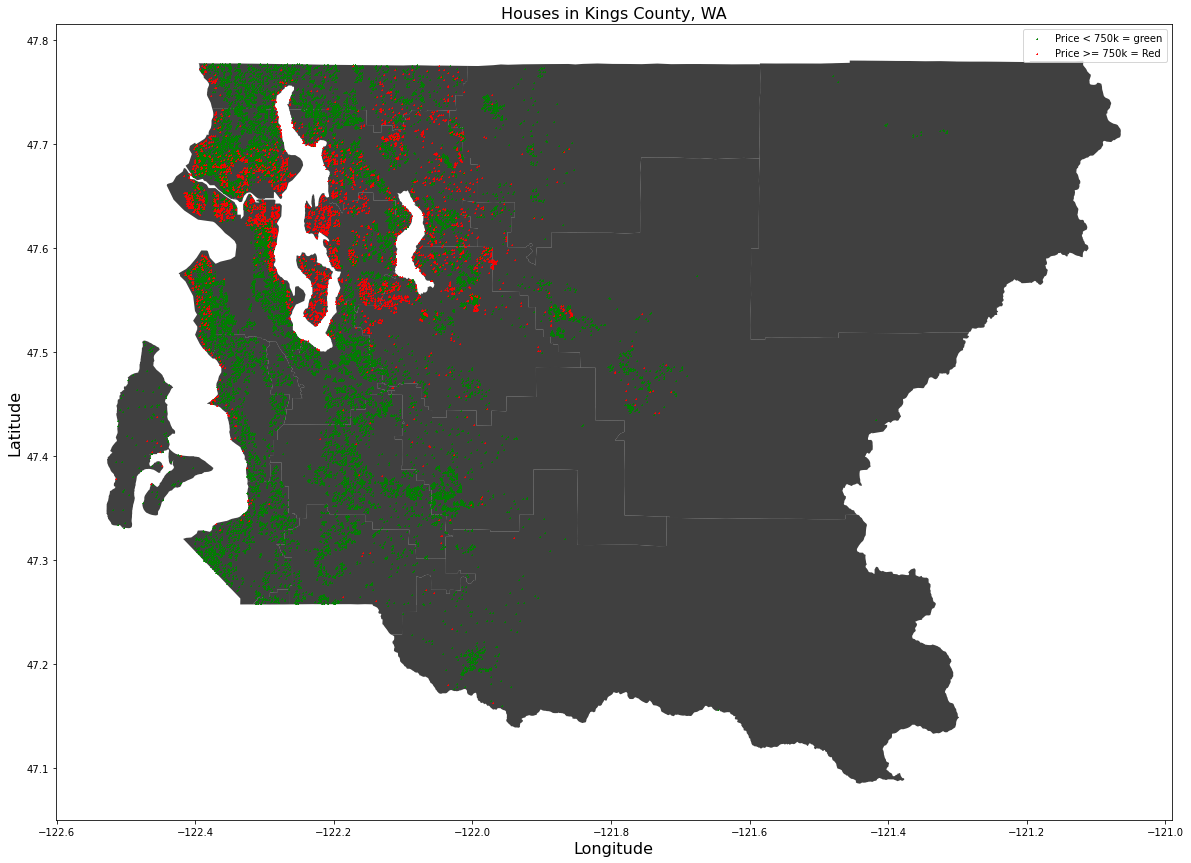

In [109]:

geometry = [Point(xy) for xy in zip(df["long"],df["lat"])]
geo_df = GeoDataFrame(df,geometry =geometry)
kings_county = gpd.read_file('../School_Districts_in_King_County___schdst_area/School_Districts_in_King_County___schdst_area.shp')

fig, ax = plt.subplots(figsize = (20,20))
kings_county.plot(ax=ax, alpha = 0.75, color = 'black')

geo_df[geo_df['price'] < 750000].plot(ax = ax , markersize = 1, color = 'green',marker = '+',label = 'Price < 750k = green',aspect = 1.5)
geo_df[geo_df['price'] >= 750000].plot(ax = ax , markersize = 1,color = 'red',marker = '+',label = 'Price >= 750k = Red', aspect = 1.5)


plt.legend(prop = {'size':10} )
ax.set_title('Houses in Kings County, WA', fontdict = {'fontsize':
                16})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 16})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 16})


plt.show()

In [110]:

fig = px.scatter_mapbox(df,lat='lat',lon='long',center=dict(lat=df.lat.mean(), lon=df.long.mean()),color = df.price, zoom=7.5,
                        mapbox_style="carto-darkmatter",color_continuous_scale= [
                [0, "green"],
                [(750000)/df.price.max(), "green"],
                [(750001)/df.price.max(), "red"],
                [1, "red"]],
                        opacity = 1,size_max=1)
                        
fig.update_layout(title = 'Houses in Kings County, WA, 2014-2015', title_x=0.5)
fig.show()

# Corrélation

In [111]:
df[df.columns[1:]].corr()['price'][:].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


In [112]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'geometry'],
      dtype='object')

Revérification de la corrélation

In [113]:
df[df.columns[1:]].corr()['price'][:].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


# Colonnes qui sont gardés

In [114]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'geometry'],
      dtype='object')

In [115]:
df_save = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'zipcode'
       , 'sqft_living15', 'sqft_lot15', 'month',
       'price']]

In [116]:
df_save

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,month,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,10,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,12,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,2,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,12,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,2,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,1530,1509,5,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,1830,7200,2,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,1020,2007,6,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,1410,1287,1,400000.0


In [117]:
pd.options.mode.chained_assignment =None

df_save['sqft_living_carre'] = df_save['sqft_living']**2
df_save['sqft_above_carre'] = df_save['sqft_above']**2
df_save['sqft_basement_carre'] = df_save['sqft_basement']**2

pd.options.mode.chained_assignment ='warn'

In [118]:
df_save.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'month',
       'price', 'sqft_living_carre', 'sqft_above_carre',
       'sqft_basement_carre'],
      dtype='object')

Affichage de la corrélation avec le prix

In [119]:
df_save = df_save[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living_carre', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_above_carre',
       'sqft_basement','sqft_basement_carre', 'zipcode', 'sqft_living15', 'sqft_lot15', 'month',
       'price']]

In [120]:
df_save[df_save.columns[0:]].corr()['price'][:].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living_carre,0.727439
sqft_living,0.702035
grade,0.667434
sqft_above_carre,0.633061
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement_carre,0.382468


Affiche les features en fonction du prix

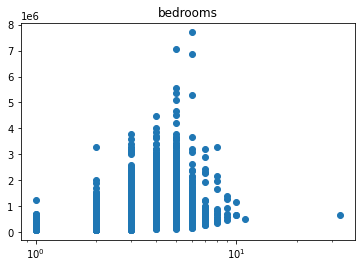

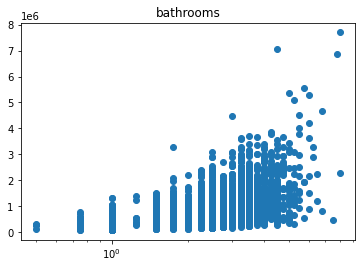

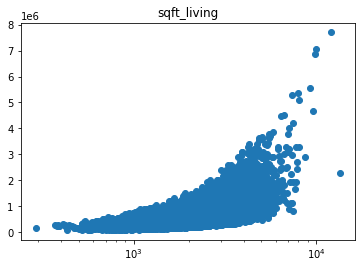

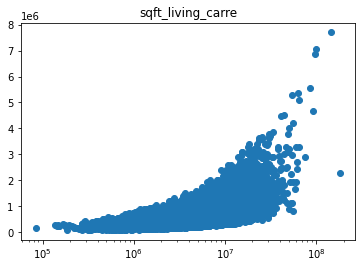

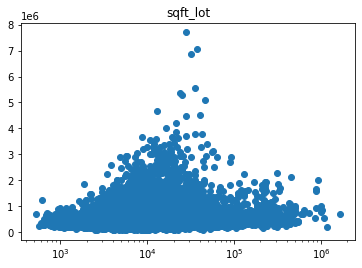

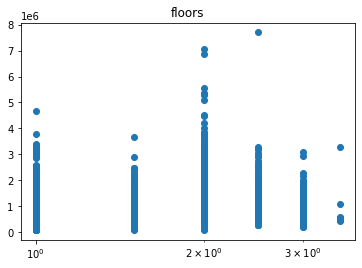

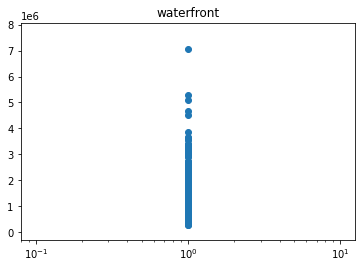

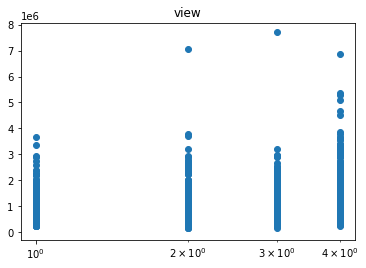

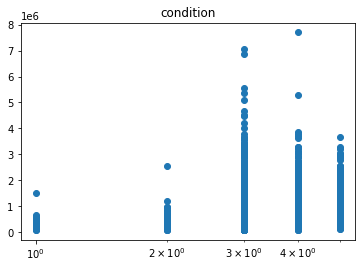

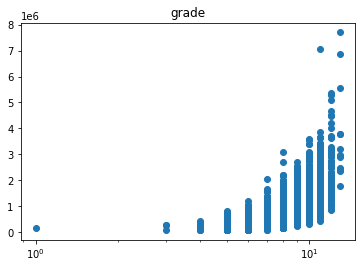

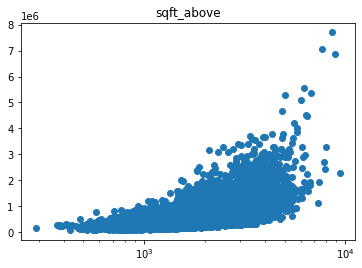

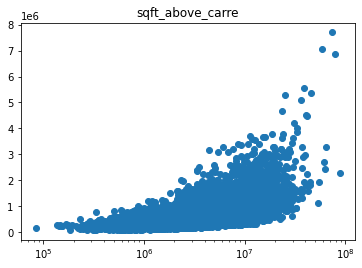

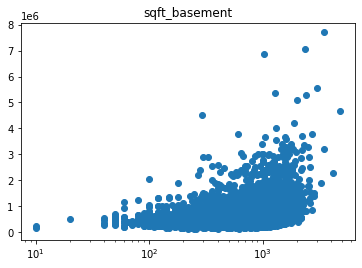

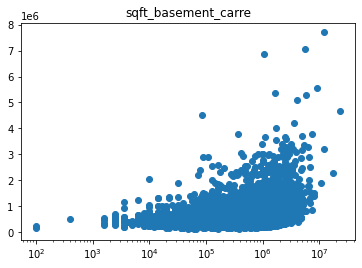

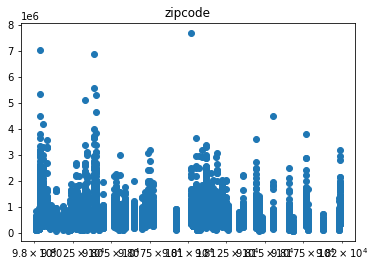

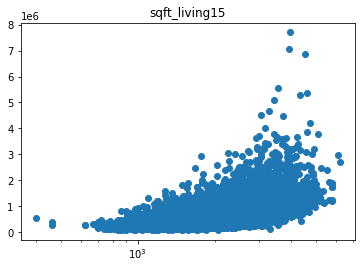

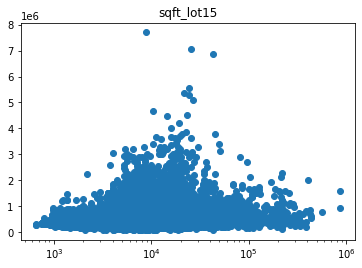

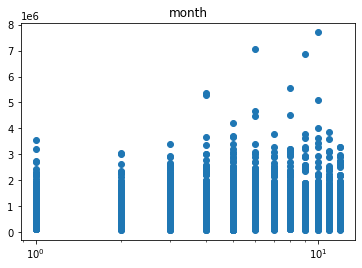

In [121]:
for column in df_save.columns[0:-1] :
    plt.scatter(df_save[column],df_save["price"])
    plt.xscale('log')
    plt.title(column)
    plt.show()

# Export en csv

In [122]:
df_save.to_csv('csv/df_preparation.csv',index=False)